In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import re

Link=("https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath=")


Datos = pd.read_csv(Link, sep=";",decimal=",")
#Datos = pd.read_csv(Link, sep=";",decimal=",", parse_dates=[['FECHA (YYMMDD)', 'HORA (HHMM)']])

Datos.columns=['Time','Hora','v1','v2','v3','v4'];
range(5)
Datos.insert(6,"AÑo",0)
Datos.insert(7,"MEs",0)
Datos.insert(8,"dia",0)
Datos.insert(9,"hora",0)


for i in range(82415):
  str1=str(Datos.loc[i,'Time'])
  Datos.iloc[i,6]=str1[0:2]
  Datos.iloc[i,7]=str1[2:4]
  Datos.iloc[i,8]=str1[4:6]
  str1=int(Datos.loc[i,'Hora']/100)
  #Datos.iloc[i,9]=re.sub("00","",str1)
  Datos.iloc[i,9]=str1

print(Datos.head())


     Time  Hora  v1  v2  v3  v4 AÑo MEs dia  hora
0  120707   100 NaN NaN NaN NaN  12  07  07     1
1  120707   200 NaN NaN NaN NaN  12  07  07     2
2  120707   300 NaN NaN NaN NaN  12  07  07     3
3  120707   400 NaN NaN NaN NaN  12  07  07     4
4  120707   500 NaN NaN NaN NaN  12  07  07     5


         Time  Hora  v1    v2  v3  v4 AÑo MEs dia  hora
0      120707   100 NaN   NaN NaN NaN  12  07  07     1
1      120707   200 NaN   NaN NaN NaN  12  07  07     2
2      120707   300 NaN   NaN NaN NaN  12  07  07     3
3      120707   400 NaN   NaN NaN NaN  12  07  07     4
4      120707   500 NaN   NaN NaN NaN  12  07  07     5
...       ...   ...  ..   ...  ..  ..  ..  ..  ..   ...
82410  211130  1900 NaN   3.0 NaN NaN  21  11  30    19
82411  211130  2000 NaN   7.0 NaN NaN  21  11  30    20
82412  211130  2100 NaN   7.0 NaN NaN  21  11  30    21
82413  211130  2200 NaN  11.0 NaN NaN  21  11  30    22
82414  211130  2300 NaN   7.0 NaN NaN  21  11  30    23

[82415 rows x 10 columns]
         Time  Hora  v1    v2  v3  v4 AÑo MEs dia  hora               Fecha
0      120707   100 NaN   NaN NaN NaN  12  07  07     1 2012-07-07 01:00:00
1      120707   200 NaN   NaN NaN NaN  12  07  07     2 2012-07-07 02:00:00
2      120707   300 NaN   NaN NaN NaN  12  07  07     3 2012-07-07 03:00:

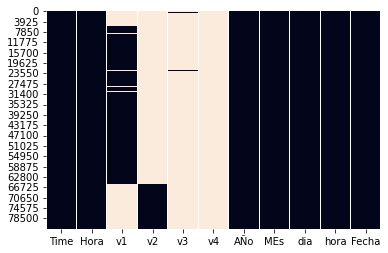

In [ ]:
import pandas as pd
#Datos.insert(9,"Fecha1",0)
#print(Datos['hora'].astype(int).describe())
print(Datos)
Datos['Fecha']=pd.to_datetime(Datos['dia'].astype(str) +'/'+ Datos['MEs'].astype(str)+'/20'+Datos['AÑo'].astype(str)+' '+Datos['hora'].astype(str)+':00:00'
, format="%d/%m/%Y %H:%M:%S")
#Datos['Fecha']=pd.to_datetime(Datos[["Fecha"]]+Datos[["Hora"]])
#Datos.loc[:,'Fecha']= pd.to_datetime(pd.to_datetime(str(Datos.loc[:,'AÑo']),str(Datos.loc[:,'MEs']),str(Datos.loc[:,'dia'])+' '+str(Datos.loc[:,'Hora'])))
#Datos['Fecha1']=pd.to_datetime(Datos['Fecha'].astype(str), dayfirst=True)
print(Datos)
import seaborn as sns
#Datos.isnull().sum()
sns.heatmap(Datos.isnull(), cbar=False)

In [ ]:
import numpy as np


Datos.iloc[:,2].fillna(0, inplace=True)
Datos.iloc[:,3].fillna(0, inplace=True)
Datos.iloc[:,4].fillna(0, inplace=True)

print(Datos.dtypes)

Datos['Registros'] = Datos.iloc[:,2]+Datos.iloc[:,3]+Datos.iloc[:,4]
print(Datos.head())
media=Datos['Registros'].mean()
print(media)
print(Datos.shape)
print(Datos.dtypes)
Datos.loc[Datos.Registros<=0,'Registros']=media

#Datos = Datos.drop(Datos[Datos.iloc[:,5]==0].index)
print(Datos.head())
print(Datos.shape)

Time              int64
Hora              int64
v1              float64
v2              float64
v3              float64
v4              float64
AÑo              object
MEs              object
dia              object
hora              int64
Fecha    datetime64[ns]
dtype: object
     Time  Hora   v1   v2   v3  ...  MEs dia hora               Fecha  Registros
0  120707   100  0.0  0.0  0.0  ...   07  07    1 2012-07-07 01:00:00        0.0
1  120707   200  0.0  0.0  0.0  ...   07  07    2 2012-07-07 02:00:00        0.0
2  120707   300  0.0  0.0  0.0  ...   07  07    3 2012-07-07 03:00:00        0.0
3  120707   400  0.0  0.0  0.0  ...   07  07    4 2012-07-07 04:00:00        0.0
4  120707   500  0.0  0.0  0.0  ...   07  07    5 2012-07-07 05:00:00        0.0

[5 rows x 12 columns]
29.376455066734103
(82415, 12)
Time                  int64
Hora                  int64
v1                  float64
v2                  float64
v3                  float64
v4                  float64
AÑo           

In [ ]:
Datos.isnull().sum()


Time             0
Hora             0
v1               0
v2               0
v3               0
v4           82415
AÑo              0
MEs              0
dia              0
hora             0
Fecha            0
Registros        0
dtype: int64

In [ ]:
#del(Datos['v1'])
#del(Datos['v2'])
#del(Datos['v3'])
#del(Datos['v4'])
#del(Datos['AÑo'])
#del(Datos['MEs'])
#del(Datos['dia'])
#del(Datos['Hora'])
#del(Datos['hora'])
#del(Datos['Time'])
Datos2=Datos

del(Datos2['v1'])
del(Datos2['v2'])
del(Datos2['v3'])
del(Datos2['v4'])
del(Datos2['AÑo'])
del(Datos2['MEs'])
del(Datos2['dia'])
del(Datos2['Hora'])
del(Datos2['hora'])
del(Datos2['Time'])

print(Datos2.head())

                Fecha  Registros
0 2012-07-07 01:00:00  29.376455
1 2012-07-07 02:00:00  29.376455
2 2012-07-07 03:00:00  29.376455
3 2012-07-07 04:00:00  29.376455
4 2012-07-07 05:00:00  29.376455


In [ ]:
Datos2.isnull().sum()

Fecha        0
Registros    0
dtype: int64

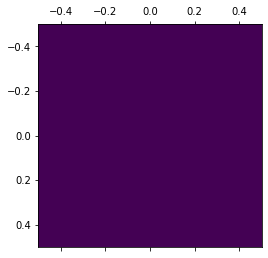

In [ ]:
import matplotlib.pyplot as plt
corr_df = Datos2.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')
plt.matshow(corr_df)
plt.show()

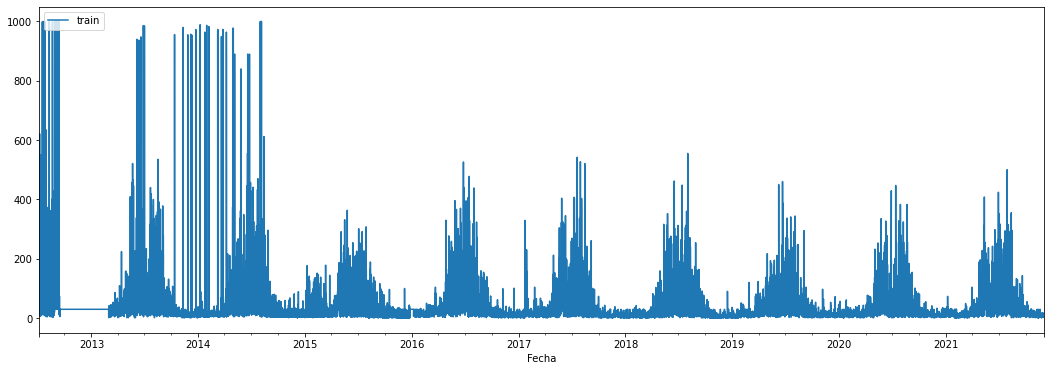

In [ ]:
import matplotlib.pyplot as mplt
import seaborn as sbn
fig, ax = plt.subplots(figsize=(18,6))
Datos2.plot(x="Fecha", y="Registros", ax=ax, label="train")

plt.legend(loc='upper left')

#plt.savefig('images/prophet-forecast-testrange.png')
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split

#X1, X2, y1, y2 = train_test_split(Datos.iloc[:,0], Datos.iloc[:,1], random_state=0,train_size=0.5)
#by_year = Datos.sort_values('Fecha',ascending=False)

train_range = Datos2[Datos2.iloc[:,0]< '2019-12-31'].index
test_range = Datos2[(Datos2.iloc[:,0] >= '2019-12-31')].index
Datos2.columns = ["1", "2"]

[12.  8.  9. ...  7. 11.  7.]
[28.77400906 23.74112053 19.16747054 ... 31.11766747 31.43439828
 27.99851687]


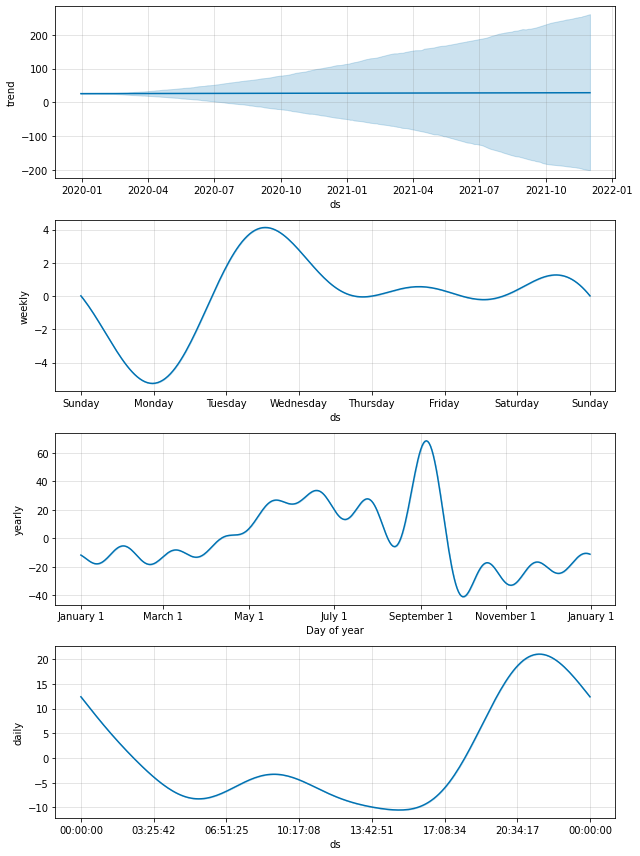

In [ ]:
from fbprophet import Prophet
df_prophet_test = Datos2.loc[test_range][["1", "2"]]
df_prophet_test.columns = ["ds", "y"]
df_prophet_train = Datos2.loc[train_range][["1", "2"]]
df_prophet_train.columns = ["ds", "y"]

model = Prophet();

model.fit (df_prophet_train)

forecast = model.predict(df_prophet_test[["ds"]])
model.plot_components(forecast)
forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')


y_test = Datos2.loc[test_range].values
y_test = Datos2.loc[test_range].iloc[:,1].values
print(y_test)
yhat_test = forecast.yhat.values
print(yhat_test)

In [ ]:
y_test = Datos2.loc[test_range].iloc[:,1].values
print(y_test)
yhat_test = forecast.yhat.values
print(yhat_test)

[12.  8.  9. ...  7. 11.  7.]
[28.77400906 23.74112053 19.16747054 ... 31.11766747 31.43439828
 27.99851687]


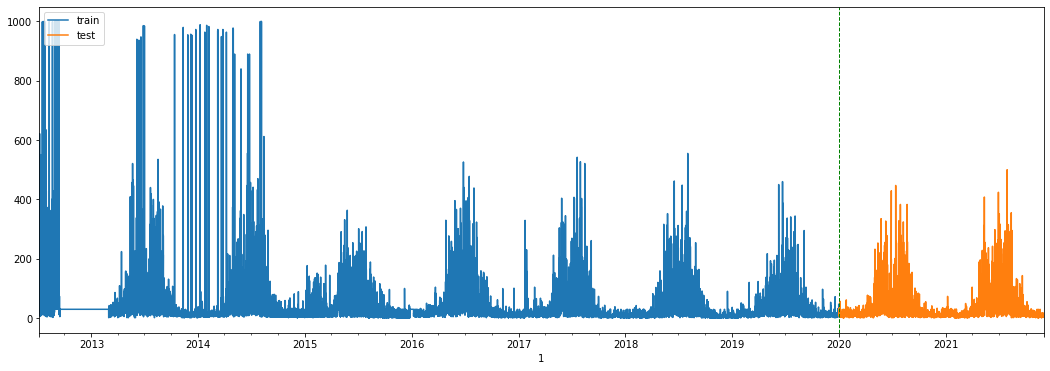

In [ ]:
fig, a2 = plt.subplots(figsize=(18,6))
Datos2.loc[train_range].plot(x="1", y="2", ax=a2, label="train")
Datos2.loc[test_range].plot(x="1", y="2", ax=a2, label="test")
plt.axvline(pd.to_datetime(str(Datos2.loc[test_range].iloc[:,0].values[0])), c='green', ls='--', lw=1)
plt.legend(loc='upper left')

                        1          2
0     2012-07-07 01:00:00  29.376455
1     2012-07-07 02:00:00  29.376455
2     2012-07-07 03:00:00  29.376455
3     2012-07-07 04:00:00  29.376455
4     2012-07-07 05:00:00  29.376455
...                   ...        ...
82410 2021-11-30 19:00:00   3.000000
82411 2021-11-30 20:00:00   7.000000
82412 2021-11-30 21:00:00   7.000000
82413 2021-11-30 22:00:00  11.000000
82414 2021-11-30 23:00:00   7.000000

[82415 rows x 2 columns]


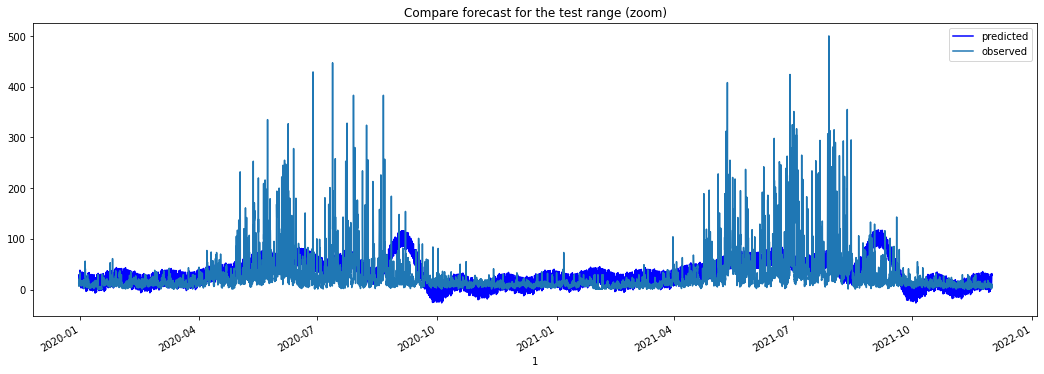

In [ ]:
import matplotlib.pyplot as plot
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(Datos2.loc[test_range].iloc[:,0].values), yhat_test, color="blue", label="predicted")

Datos2.loc[test_range].plot(x="1", y="2", ax=ax, label="observed")
plt.legend(loc='best')
plt.title('Compare forecast for the test range (zoom)')

print((Datos2))




#plt.savefig('images/prophet-forecast-testrange-zoom.png')
plt.show();

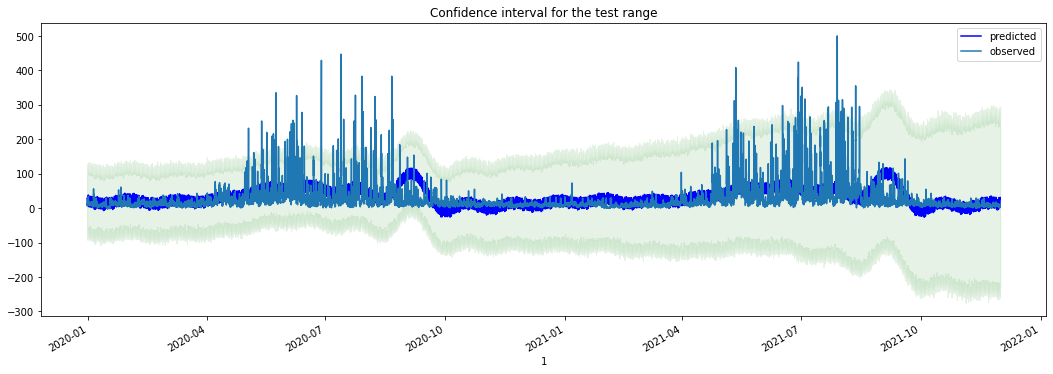

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(Datos2.loc[test_range].iloc[:,0].values), yhat_test, color="blue", label="predicted")

ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    forecast_ci['yhat_lower'],
    forecast_ci['yhat_upper'],
    color='g',
    alpha=0.1)

Datos2.loc[test_range].plot(x="1", y="2", ax=ax, label="observed")


plt.legend(loc='best')
plt.title('Confidence interval for the test range')

#plt.savefig('images/prophet-forecast-testrange-confidence-interval.png')
plt.show();

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def theils_u_metric(y_true, y_pred):
    """Calculate Theil's U statistics using observed and predicted vectors."""
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))

In [ ]:
print(y_test)
print(yhat_test)
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
u = theils_u_metric(y_test, yhat_test)

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))
print("U   (test): {:0.6f}".format(u))

[12.  8.  9. ...  7. 11.  7.]
[28.77400906 23.74112053 19.16747054 ... 31.11766747 31.43439828
 27.99851687]
MAE (test): 22
MSE (test): 1162
R2  (test): 0.052
U   (test): 0.020907
